In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score , confusion_matrix  , classification_report  
from sklearn.model_selection import train_test_split , cross_val_score

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv("C:\\Users\\Shree123\\MACHINE LEARNING PROJECT TYCS\\Datasets\\Titanic-Dataset.csv")

In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
247,248,1,2,"Hamalainen, Mrs. William (Anna)",female,24.0,0,2,250649,14.5000,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S


In [6]:
df.drop(columns = ['PassengerId' , 'Name' , 'Ticket' , 'Cabin'] , inplace = True)

In [7]:
df.shape

(891, 8)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
# Total Family members
df['family_tot_members'] = df['SibSp'] + df['Parch']
df['family_tot_members'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_tot_members, dtype: int64

In [11]:
df.drop(columns = ['SibSp' , 'Parch'] , inplace = True)

In [12]:
df.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_tot_members
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [13]:
X = df.iloc[:,1:]
X.head()

,Pclass,Sex,Age,Fare,Embarked,family_tot_members
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [14]:
X.shape

(891, 6)

In [15]:
y =df.iloc[:,:1]

In [16]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [17]:
y.shape

(891, 1)

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 1 , test_size = 0.2)

In [19]:
print(X_train.shape , X_test.shape)

(712, 6) (179, 6)


In [20]:
transformer = ColumnTransformer(transformers = [
    ('trf1' , SimpleImputer(strategy = 'mean') , ['Age']),
    ('trf2' , SimpleImputer(strategy = 'most_frequent') , ['Embarked'])
] , remainder = 'passthrough')

In [21]:
X_train1 = transformer.fit_transform(X_train)

In [22]:
X_test1 = transformer.transform(X_test)

In [23]:
X_train1 = pd.DataFrame(X_train1)
X_test1 = pd.DataFrame(X_test1) 

In [24]:
X_train1.head()

,0,1,2,3,4,5
0,30.166232,Q,3,male,23.25,2
1,30.0,C,1,female,56.9292,0
2,34.0,S,2,female,10.5,0
3,21.0,S,2,male,73.5,2
4,62.0,S,2,male,10.5,0


In [32]:
X_train1[1].value_counts()

S    515
C    133
Q     64
Name: 1, dtype: int64

In [25]:
transformer1 = ColumnTransformer(transformers = [
    ('trf3' , OneHotEncoder(sparse = False) , [3] ),
    ('trf4' , OneHotEncoder(sparse = False , drop = 'first') , [1] )
] , remainder = 'passthrough')

In [26]:
X_train2 = transformer1.fit_transform(X_train1)
X_test2 = transformer1.transform(X_test1)

In [27]:
X_train2 = pd.DataFrame(X_train2)
X_test2 = pd.DataFrame(X_test2)

In [28]:
X_train2.head()

,0,1,2,3,4,5,6,7
0,0.0,1.0,1.0,0.0,30.166232,3,23.25,2
1,1.0,0.0,0.0,0.0,30.0,1,56.9292,0
2,1.0,0.0,0.0,1.0,34.0,2,10.5,0
3,0.0,1.0,0.0,1.0,21.0,2,73.5,2
4,0.0,1.0,0.0,1.0,62.0,2,10.5,0


In [33]:
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train2)
X_test3 = scaler.transform(X_test2)

In [34]:
X_train3 = pd.DataFrame(X_train3)
X_test3 = pd.DataFrame(X_test3)

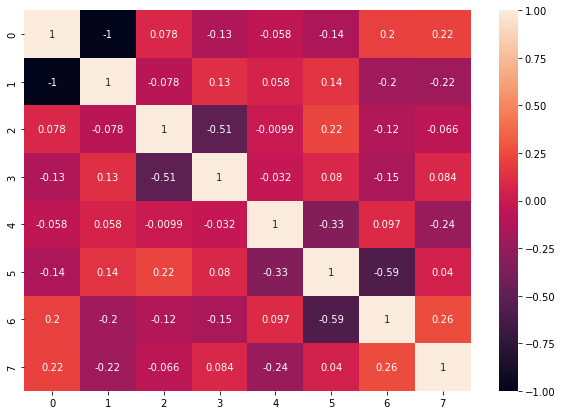

In [35]:
plt.figure(figsize = (10,7))
sns.heatmap(X_train3.corr() , annot = True)
plt.show()

In [36]:
model = LogisticRegression()

In [37]:
model.fit(X_train3 , y_train)

LogisticRegression()

In [39]:
y_pred = model.predict(X_test3)

In [40]:
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [49]:
print('model accuracy:' , accuracy_score(y_test , y_pred)*100)

model accuracy: 79.88826815642457


In [50]:
#  Cross Validation

In [52]:
print('Cross Val Score:', np.mean(cross_val_score(model , X_train3 , y_train , scoring = 'accuracy' , cv =10)*100))

Cross Val Score: 80.34624413145539


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Line Graph Example

In [3]:
x = [1,2,3,4,5,6,7,8,9]
y1 = [1,3,5,3,1,3,5,3,1]
y2 = [2,4,6,4,2,4,6,4,2]

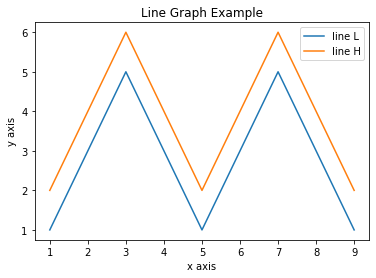

In [5]:
plt.plot(x,y1, label = 'line L')
plt.plot(x,y2, label = 'line H')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Graph Example')
plt.legend()
plt.show()

# LateX Equation

$e^{i\pi} + 1 = 0$

$$e^x = \sum{1=0}^\infty  \frac{1}{i !}x^i$$